# Introducción al aprendizaje de máquinas: clasificación de la asignación de fuentes de basalto

## Importar librerías científicas de Python

In [25]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import copy

## Machine learning
Text from: https://scikit-learn.org/stable/tutorial/basic/tutorial.html

En general, un problema de aprendizaje de máquinas considera un conjunto de n muestras de datos y luego intenta predecir las propiedades de datos desconocidos. Si cada muestra tiene más de un número o una entrada multidimensional (también conocida como datos multivariados), se dice que tiene varios atributos o características.

Los problemas de aprendizaje se dividen en algunas categorías:
- **aprendizaje supervisado**, en el que los datos vienen con atributos adicionales que queremos predecir (haga clic aquí para ir a la página de aprendizaje supervisado de scikit-learn). Este problema puede ser:
    - *clasificación*: las muestras pertenecen a dos o más clases y queremos aprender de los datos ya etiquetados cómo predecir la clase de datos no etiquetados. Un ejemplo de un problema de clasificación sería el reconocimiento de dígitos escritos a mano, en el que el objetivo es asignar cada vector de entrada a una de un número finito de categorías discretas. Otra forma de pensar en la clasificación es como una forma discreta (en oposición a continua) de aprendizaje supervisado donde se tiene un número limitado de categorías y para cada una de las n muestras proporcionadas, se trata de etiquetarlas con la categoría o clase correcta. .
    - *regresión*: si la salida deseada consta de una o más variables continuas, entonces la tarea a realizar se llama regresión. Un ejemplo de un problema de regresión sería la predicción de la longitud de un salmón en función de su edad y peso.

- **aprendizaje no supervisado**, en el que los datos de entrenamiento consisten en un conjunto de vectores de entrada x sin ningún valor objetivo correspondiente. El objetivo en tales problemas puede ser descubrir grupos de ejemplos similares dentro de los datos, donde se llama agrupamiento, o determinar la distribución de datos dentro del espacio de entrada, conocido como estimación de densidad, proyectar los datos desde una alta dimensión o reducir el espacio a dos o tres dimensiones para fines de visualización (haga clic aquí para ir a la página de aprendizaje no supervisado de Scikit-Learn).

### Conjunto de entrenamiento y prueba

El aprendizaje automático consiste en aprender algunas propiedades de un conjunto de datos y luego probar esas propiedades con otro conjunto de datos. Una práctica común en el aprendizaje automático es evaluar un algoritmo dividiendo un conjunto de datos en dos. A uno de esos conjuntos lo llamamos conjunto de entrenamiento, en el que aprendemos algunas propiedades; llamamos al otro conjunto el conjunto de prueba, en el que probamos las propiedades aprendidas.

**Hoy nos centraremos en la clasificación a través de un enfoque de aprendizaje supervisado**

*Los sistemas que realizan este tipo de análisis están a nuestro alrededor. Considere un filtro de spam, por ejemplo.*

# Clasificando rocas volcánicas

<img src="./images/volcanic-tectonics.png" width = 600 align = 'center'>

Hoy vamos a seguir tratando con datos de geoquímica ígnea. Las rocas ígneas son aquellas que cristalizan a partir del enfriamiento del magma. Los diferentes magmas tienen diferentes composiciones asociadas con su origen, como exploramos la semana pasada. Durante la clase de hoy, continuaremos enfocándonos en los datos de los flujos de lava máficos (estos se llaman basaltos y son el extremo relativamente bajo en sílice y alto contenido de hierro).

> Las rocas ígneas se forman en una amplia variedad de entornos tectónicos,
incluyendo dorsales oceánicas, islas oceánicas y arcos volcánicos. Es un problema de gran interés para los petrólogos ígneos. Recuperar el entorno tectónico original de las rocas máficas del pasado. Cuando el entorno geológico por sí solo no puede resolver esta cuestión, la composición química de estas rocas pueden contener la respuesta. El mayor, menor, y trazas de composición elemental de basaltos muestra grandes variaciones, por ejemplo en función de la profundidad de la formación 
(e.g., Kushiro and Kuno, 1963) --- *Vermeesch (2006)*


Para este análisis usaremos un conjunto de datos que fue compilado en:
Vermeesch (2006) Tectonic discrimination of basalts with classification trees, *Geochimica et Cosmochimica Acta*  https://doi.org/10.1016/j.gca.2005.12.016

Estos datos se agruparon en 3 categorías:

- 256 ***Island arc basalts (IAB)*** obtenidos los arcos de Aeolian, Izu-Bonin, Kermadec, Kurile, Lesser Antilles, Mariana, Scotia, y Tonga.
- 241 ***Mid-ocean ridge (MORB)*** muestras de las dorsales océanicas: the East Pacific Rise, Mid Atlantic Ridge, Indian Ocean, and Juan de Fuca Ridge.
- 259 ***Ocean-island (OIB)*** muestras de St. Helena, the Canary, Cape Verde, Caroline, Crozet, Hawaii-Emperor, Juan Fernandez, Marquesas, Mascarene, Samoan, y Society islands.

**Veamos la ilustración de arriba y determinemos dónde se encuentran cada uno de estos ajustes dentro de un contexto tectónico de placas.**

## Importando datos


Los datos provienen de los materiales complementarios del artículo de Vermeesch (2006). Las muestras se agrupan por afinidad (o tipo) MORB, OIB e IAB. Además, se les asignan códigos de afinidad y colores del ciclo matplotlib predeterminado:

|affinity| affinity code | color |
|--------|---------------|-------|
| MORB| 0 | C0
| OIB |  1 | C1
| IAB |  2 | C2

In [26]:
basalt_data = pd.read_csv('./data/Vermeesch2006.csv')
basalt_data.tail()

,affinity,affinity code,color,SiO2 (wt%),TiO2 (wt%),Al2O3 (wt%),Fe2O3 (wt%),FeO (wt%),CaO (wt%),MgO (wt%),MnO (wt%),K2O (wt%),Na2O (wt%),P2O5(wt%),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Sc (ppm),V (ppm),Cr (ppm),Co (ppm),Ni (ppm),Cu (ppm),Zn (ppm),Ga (ppm),Rb (ppm),Sr (ppm),Y (ppm),Zr (ppm),Nb (ppm),Sn (ppm),Cs (ppm),Ba (ppm),Hf (ppm),Ta (ppm),Pb (ppm),Th (ppm),U (ppm),143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb
751,IAB,2,C2,50.97,0.78,18.86,NaN,NaN,10.85,4.71,0.16,0.60,2.38,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,34.0,152.0,NaN,NaN,7.5,371.0,19.3,56.0,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.82,15.556,38.389
752,IAB,2,C2,51.00,1.41,17.06,3.80,7.04,9.97,4.96,0.17,0.73,2.56,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,395.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70348,NaN,NaN,NaN
753,IAB,2,C2,52.56,1.21,17.74,2.28,7.53,10.48,5.57,0.24,0.29,2.27,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70362,NaN,NaN,NaN
754,IAB,2,C2,52.59,1.50,16.88,2.41,7.90,10.83,4.91,0.26,0.54,1.63,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70363,NaN,NaN,NaN
755,IAB,2,C2,52.96,1.27,15.65,2.91,9.32,9.78,4.24,0.23,0.46,2.54,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70352,NaN,NaN,NaN


In [27]:
MORB_data = basalt_data[basalt_data['affinity']=='MORB']
OIB_data = basalt_data[basalt_data['affinity']=='OIB']
IAB_data = basalt_data[basalt_data['affinity']=='IAB']

## ¿Se pueden utilizar datos geoquímicos para clasificar el entorno tectónico?

Estos datos están etiquetados. El autor ya determinó de qué entorno procedían estos basaltos. Sin embargo, ¿hay alguna forma de que podamos utilizar estos datos etiquetados para determinar el entorno de un basalto desconocido?

Un artículo publicado en 1982 propuso que los elementos titanio y vanadio eran particularmente buenos para dar una idea del entorno tectónico. Los detalles de por qué lo son bastante complicados y pueden resumirse como "el agotamiento de V en relación con el Ti es una función del fO2 del magma y su fuente, el grado de fusión parcial y posterior cristalización fraccionada". Si sigues geología, aprenderás más sobre los fundamentos detrás de esta petrología ígnea. *Por el momento, puede considerar la hipótesis que detrás de esta clasificación de que diferentes ambientes magmáticos tienen diferencias en los estados de oxidación que se reflejan en las relaciones Ti vs V.*

Shervais, J.W. (1982) Ti-V plots and the petrogenesis of modern and ophiolitic lavas *Earth and Planetary Science Letters* https://doi.org/10.1016/0012-821X(82)90120-0

### Plotear TiO2 (wt%) vs V (ppm)

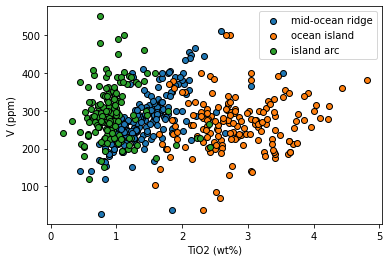

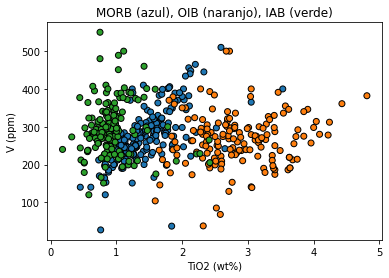

In [28]:
plt.scatter(MORB_data['TiO2 (wt%)'],MORB_data['V (ppm)'],label='mid-ocean ridge',edgecolors='black')
plt.scatter(OIB_data['TiO2 (wt%)'],OIB_data['V (ppm)'],label='ocean island',edgecolors='black')
plt.scatter(IAB_data['TiO2 (wt%)'],IAB_data['V (ppm)'],label='island arc',edgecolors='black')
plt.xlabel('TiO2 (wt%)')
plt.ylabel('V (ppm)')
plt.legend()
plt.show()

scatter_plot = plt.scatter(basalt_data['TiO2 (wt%)'],basalt_data['V (ppm)'],color=basalt_data['color'],edgecolors='black')
plt.xlabel('TiO2 (wt%)')
plt.ylabel('V (ppm)')
plt.title('MORB (azul), OIB (naranjo), IAB (verde)')
plt.show()

### Utilice la función groupby de pandas para agrupar por tipos y describir los valores de una columna

**Código para escribir: Use el comando ``groupby`` y describa la concentración de vanadio agrupada para los datos.**

*¿Podemos diferenciar entre las diferentes tipos/afinidades mirando solo la concentración de vanadio?*

In [50]:
basalt_data.groupby('affinity')['V (ppm)'].describe()

,count,mean,std,min,25%,50%,75%,max
affinity,,,,,,,,
IAB,160.0,292.914500,71.301634,120.0,239.500,285.5,331.000,550.0
MORB,199.0,276.795477,72.389875,27.0,237.500,272.0,309.500,510.0
OIB,166.0,266.404217,70.167589,37.6,222.575,267.5,304.775,500.0


Sí, es posible observar que, las tres afinidades poseen distinto promedio y mediana, así, mirando solo la concentración de Vanadio es posible establecer la hipótesis de que el orden de menor a mayor de concentración de Vanadio es OIB, MORB, IAB. No necesariamente este es un test definitivo.

**Replantearse esto**

## Método de clasificación 'al ojo'

Para clasificar el basalto en diversos tipos según las concentraciones de titanio y vanadio, podemos utilizar un método de clasificación.

El objetivo aquí es poder hacer una inferencia de en qué entorno se formó un basalto desconocido en función de la comparación con estos datos.

Digamos que tenemos tres puntos donde se desconoce su tipo/afinidad.
- el punto 1 tiene TiO2 del 4% y una concentración de V de 300 ppm
- el punto 2 tiene TiO2 del 1% y una concentración de V de 350 ppm
- el punto 3 tiene TiO2 de 1,9% y una concentración de V de 200 ppm

**Vamos a votar sobre cómo deben clasificarse**

***ESCRIBA CÓMO PIENSAN QUE DEBEN SER CLASIFICADOS AQUÍ***

In [32]:
point_1_TiO2 = 4
point_1_V = 300
point_2_TiO2 = 1
point_2_V = 350
point_3_TiO2 = 1.9
point_3_V = 200

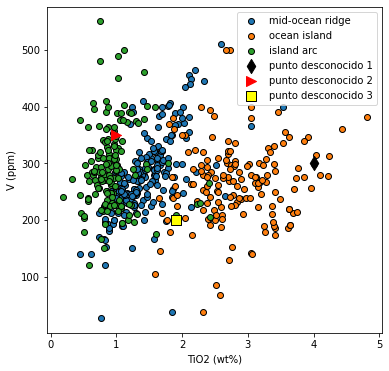

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(MORB_data['TiO2 (wt%)'],MORB_data['V (ppm)'],label='mid-ocean ridge',edgecolors='black')
plt.scatter(OIB_data['TiO2 (wt%)'],OIB_data['V (ppm)'],label='ocean island',edgecolors='black')
plt.scatter(IAB_data['TiO2 (wt%)'],IAB_data['V (ppm)'],label='island arc',edgecolors='black')
plt.scatter(point_1_TiO2,point_1_V,label='punto desconocido 1',color='black',marker='d',s=100)
plt.scatter(point_2_TiO2,point_2_V,label='punto desconocido 2',color='red',marker='>',s=100)
plt.scatter(point_3_TiO2,point_3_V,label='punto desconocido 3',color='yellow',edgecolors='black',marker='s',s=100)
plt.xlabel('TiO2 (wt%)')
plt.ylabel('V (ppm)')
plt.legend()
plt.show()

## Clasificación usando el vecino más cercano

En la clasificación de vecinos más cercanos, la clasificación se calcula a partir de un voto mayoritario simple de los vecinos más cercanos de cada punto: a un punto de consulta se le asigna la clase de datos que tiene más representantes dentro de los vecinos más cercanos del punto. Hay diferentes formas en que esto se puede hacer y se puede ponderar.

### Filtra los datos a los que tienen datos Ti y V

In [34]:
basalt_data_Ti_V = basalt_data[(~basalt_data['TiO2 (wt%)'].isna()) & (~basalt_data['V (ppm)'].isna())]

### Normalizar los datos

Dado que el vecino más cercano es una distancia y que el eje y y el eje x son tan diferentes (en parte debido a diferentes unidades), necesitamos normalizar los datos. Dividiremos el 'TiO2 (% en peso)' por el 'TiO2 máximo (% en peso)' para obtener un valor entre 0 y 1. También haremos lo mismo para V (ppm).

In [35]:
basalt_data_Ti_V.loc[:,'Ti_norm'] = basalt_data['TiO2 (wt%)']/np.max(basalt_data['TiO2 (wt%)'])
basalt_data_Ti_V.head()

,affinity,affinity code,color,SiO2 (wt%),TiO2 (wt%),Al2O3 (wt%),Fe2O3 (wt%),FeO (wt%),CaO (wt%),MgO (wt%),MnO (wt%),K2O (wt%),Na2O (wt%),P2O5(wt%),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Sc (ppm),V (ppm),Cr (ppm),Co (ppm),Ni (ppm),Cu (ppm),Zn (ppm),Ga (ppm),Rb (ppm),Sr (ppm),Y (ppm),Zr (ppm),Nb (ppm),Sn (ppm),Cs (ppm),Ba (ppm),Hf (ppm),Ta (ppm),Pb (ppm),Th (ppm),U (ppm),143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb,Ti_norm
0,MORB,0,C0,48.200,2.520,15.20,2.31,8.56,9.69,7.150,0.170,0.900,3.790,0.44,18.48,41.19,NaN,NaN,6.67,2.02,NaN,1.17,NaN,NaN,NaN,NaN,3.68,0.54,28.80,297.0,196.0,43.00,113.00,44.00,97.00,NaN,13.09,342.0,NaN,289.0,NaN,NaN,NaN,NaN,5.20,NaN,2.150,1.4881,0.4941,NaN,0.703000,NaN,NaN,NaN,0.523909
1,MORB,0,C0,49.580,1.165,17.82,9.31,NaN,11.87,7.130,0.155,0.070,2.730,0.10,2.42,7.84,1.34,7.49,2.63,0.96,3.53,0.67,4.52,0.95,2.90,0.42,2.86,0.45,32.71,229.4,315.5,39.96,122.20,62.62,64.85,15.20,0.89,119.3,28.29,72.0,1.83,NaN,0.016,9.54,1.98,0.128,0.386,0.1170,0.0350,0.513152,0.702496,18.439,15.489,37.878,0.242204
2,MORB,0,C0,49.890,1.670,16.16,10.74,NaN,11.05,6.960,0.180,0.190,2.890,0.16,3.98,12.08,2.05,11.16,3.81,1.35,5.06,0.90,6.03,1.27,3.77,0.60,3.80,0.60,38.43,296.6,224.0,40.60,82.27,64.28,83.26,16.28,1.55,130.2,38.52,117.7,3.25,NaN,0.029,14.15,3.13,0.216,0.638,0.2240,0.1000,0.513134,0.702518,18.504,15.494,37.920,0.347193
3,MORB,0,C0,50.170,1.565,16.58,9.92,NaN,11.40,7.120,0.165,0.265,2.860,0.16,4.08,12.59,2.01,10.98,3.63,1.32,4.79,0.96,5.80,1.26,3.56,0.56,3.62,0.51,35.06,279.2,266.7,40.87,111.81,64.28,75.67,15.85,2.48,130.4,35.74,114.1,3.45,NaN,0.034,15.77,2.95,0.205,0.535,0.2010,0.2710,0.513155,0.702505,18.426,15.466,37.828,0.325364
4,MORB,0,C0,50.325,1.630,15.46,10.71,NaN,10.79,7.655,0.180,0.130,3.125,0.16,4.20,13.19,2.08,11.40,3.61,1.31,4.77,0.89,5.74,1.21,3.50,0.52,3.47,0.54,39.00,301.4,282.6,46.89,116.33,65.85,77.92,15.49,1.45,140.7,36.26,116.6,3.28,NaN,0.022,14.94,2.91,0.202,0.604,0.2160,0.0700,0.513147,0.702517,18.438,15.487,37.865,0.338877


**Código para que escribas**

Haga una columna llamada V_norm que sea vanadio normalizado

In [36]:
basalt_data_Ti_V.loc[:,'V_norm'] = basalt_data['V (ppm)']/np.max(basalt_data['V (ppm)'])
basalt_data_Ti_V.head()

,affinity,affinity code,color,SiO2 (wt%),TiO2 (wt%),Al2O3 (wt%),Fe2O3 (wt%),FeO (wt%),CaO (wt%),MgO (wt%),MnO (wt%),K2O (wt%),Na2O (wt%),P2O5(wt%),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Sc (ppm),V (ppm),Cr (ppm),Co (ppm),Ni (ppm),Cu (ppm),Zn (ppm),Ga (ppm),Rb (ppm),Sr (ppm),Y (ppm),Zr (ppm),Nb (ppm),Sn (ppm),Cs (ppm),Ba (ppm),Hf (ppm),Ta (ppm),Pb (ppm),Th (ppm),U (ppm),143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb,Ti_norm,V_norm
0,MORB,0,C0,48.200,2.520,15.20,2.31,8.56,9.69,7.150,0.170,0.900,3.790,0.44,18.48,41.19,NaN,NaN,6.67,2.02,NaN,1.17,NaN,NaN,NaN,NaN,3.68,0.54,28.80,297.0,196.0,43.00,113.00,44.00,97.00,NaN,13.09,342.0,NaN,289.0,NaN,NaN,NaN,NaN,5.20,NaN,2.150,1.4881,0.4941,NaN,0.703000,NaN,NaN,NaN,0.523909,0.540000
1,MORB,0,C0,49.580,1.165,17.82,9.31,NaN,11.87,7.130,0.155,0.070,2.730,0.10,2.42,7.84,1.34,7.49,2.63,0.96,3.53,0.67,4.52,0.95,2.90,0.42,2.86,0.45,32.71,229.4,315.5,39.96,122.20,62.62,64.85,15.20,0.89,119.3,28.29,72.0,1.83,NaN,0.016,9.54,1.98,0.128,0.386,0.1170,0.0350,0.513152,0.702496,18.439,15.489,37.878,0.242204,0.417091
2,MORB,0,C0,49.890,1.670,16.16,10.74,NaN,11.05,6.960,0.180,0.190,2.890,0.16,3.98,12.08,2.05,11.16,3.81,1.35,5.06,0.90,6.03,1.27,3.77,0.60,3.80,0.60,38.43,296.6,224.0,40.60,82.27,64.28,83.26,16.28,1.55,130.2,38.52,117.7,3.25,NaN,0.029,14.15,3.13,0.216,0.638,0.2240,0.1000,0.513134,0.702518,18.504,15.494,37.920,0.347193,0.539273
3,MORB,0,C0,50.170,1.565,16.58,9.92,NaN,11.40,7.120,0.165,0.265,2.860,0.16,4.08,12.59,2.01,10.98,3.63,1.32,4.79,0.96,5.80,1.26,3.56,0.56,3.62,0.51,35.06,279.2,266.7,40.87,111.81,64.28,75.67,15.85,2.48,130.4,35.74,114.1,3.45,NaN,0.034,15.77,2.95,0.205,0.535,0.2010,0.2710,0.513155,0.702505,18.426,15.466,37.828,0.325364,0.507636
4,MORB,0,C0,50.325,1.630,15.46,10.71,NaN,10.79,7.655,0.180,0.130,3.125,0.16,4.20,13.19,2.08,11.40,3.61,1.31,4.77,0.89,5.74,1.21,3.50,0.52,3.47,0.54,39.00,301.4,282.6,46.89,116.33,65.85,77.92,15.49,1.45,140.7,36.26,116.6,3.28,NaN,0.022,14.94,2.91,0.202,0.604,0.2160,0.0700,0.513147,0.702517,18.438,15.487,37.865,0.338877,0.548000


**Código para escribir**

Haga un diagrama de dispersión de Ti_norm vs V_norm que esté coloreado por afinidad (`color = basalt_data_Ti_V ['color']`). Debería parecerse mucho a los gráficos de dispersión anteriores.

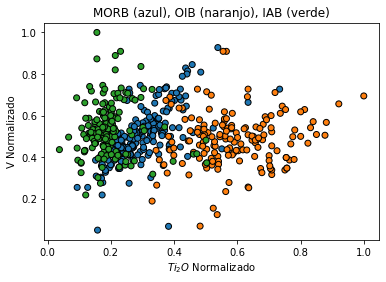

In [44]:
plt.scatter(basalt_data_Ti_V['Ti_norm'],basalt_data_Ti_V['V_norm'],color=basalt_data_Ti_V['color'],edgecolors='black')
plt.title('MORB (azul), OIB (naranjo), IAB (verde)')
plt.xlabel('$Ti_{2}O$ Normalizado')
plt.ylabel('V Normalizado')

plt.show()

### Preparando las matrices de datos

Haremos una matriz 2 x n de los valores de TiO2 (% en peso) y V (ppm) (donde n es el número de puntos de datos) y una matriz 1 x n de las clasificaciones (las afinidades tectónicas).

In [45]:
basalt_Ti_V = basalt_data_Ti_V[['Ti_norm', 'V_norm']].values
basalt_Ti_V

array([[0.52390852, 0.54      ],
       [0.24220374, 0.41709091],
       [0.34719335, 0.53927273],
       ...,
       [0.17671518, 0.61636364],
       [0.17463617, 0.54363636],
       [0.15800416, 0.49636364]])

In [46]:
basalt_affinity = basalt_data_Ti_V['affinity'].tolist()
basalt_affinity_code = basalt_data_Ti_V['affinity code'].tolist()

## Importar sci-kit learn 

Usaremos la biblioteca scikit-learn, que es una biblioteca ampliamente utilizada para el aprendizaje automático en Python.

In [51]:
from sklearn import neighbors

### Definiendo nuestro clasificador

Construiremos un clasificador que use los 5 vecinos más cercanos (`n_neighbors = 5`) y los puntos de peso por la inversa de su distancia (`weights = 'distance'`) de modo que los vecinos más cercanos de un punto de consulta tengan una mayor influencia que vecinos que están más lejos.

In [52]:
classifier_neighbors = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

### Ajustar/entrenar el clasificador

Entonces podemos entrenar el arreglo de los datos y el arreglo de la clasificación en una función `.fit` preformada en el 'objet' clasificador.

In [53]:
classifier_neighbors.fit(basalt_Ti_V, basalt_affinity)

KNeighborsClassifier(weights='distance')

### Normalizando los puntos misteriosos

In [54]:
point_1_TiO2_norm = 4/np.max(basalt_data['TiO2 (wt%)'])
point_1_V_norm = 300/np.max(basalt_data['V (ppm)'])
point_2_TiO2_norm = 1/np.max(basalt_data['TiO2 (wt%)'])
point_2_V_norm = 350/np.max(basalt_data['V (ppm)'])
point_3_TiO2_norm = 1.9/np.max(basalt_data['TiO2 (wt%)'])
point_3_V_norm = 200/np.max(basalt_data['V (ppm)'])

### Predecir la afinidad tectónica de los puntos misteriosos usando el clasificador de vecinos

In [55]:
classifier_neighbors.predict([[point_1_TiO2_norm,point_1_V_norm],
                             [point_2_TiO2_norm,point_2_V_norm],
                             [point_3_TiO2_norm,point_3_V_norm]])

array(['OIB', 'IAB', 'OIB'], dtype='<U4')

### Ajustar/entrenar usando basalt_affinity_code en lugar de los string.

In [56]:
classifier_neighbors.fit(basalt_Ti_V, basalt_affinity_code)

KNeighborsClassifier(weights='distance')

In [57]:
classifier_neighbors.predict([[point_1_TiO2_norm,point_1_V_norm],
                    [point_2_TiO2_norm,point_2_V_norm],
                    [point_3_TiO2_norm,point_3_V_norm]])

array([1, 2, 1])

### Visualización del límite de decisión

Hagamos una cuadrícula de 101 x 101 de valores x e y entre 0 y 1.

In [58]:
xx, yy = np.meshgrid(np.linspace(0, 1, 101),
                     np.linspace(0, 1, 101))
grid = np.c_[xx.ravel(), yy.ravel()]

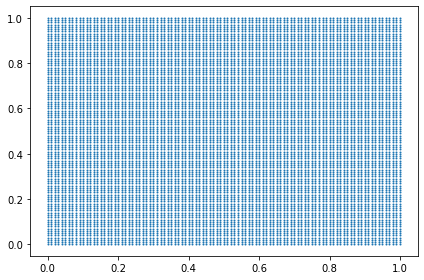

In [59]:
plt.scatter(xx, yy, s=1)
plt.tight_layout()

### Clasifición en la cuadrícula

In [60]:
grid_classes = classifier_neighbors.predict(grid)
grid_classes

array([0, 0, 0, ..., 1, 1, 1])

<ipython-input-61-6968285391a0>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, grid_classes, cmap=cmap)


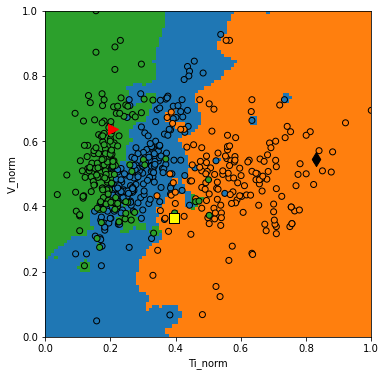

In [61]:
cmap = ListedColormap(['C0', 'C1', 'C2'])
grid_classes = grid_classes.reshape(xx.shape)

plt.figure(figsize=(6,6))

plt.pcolormesh(xx, yy, grid_classes, cmap=cmap)
scatter_plot = plt.scatter(basalt_data_Ti_V['Ti_norm'],basalt_data_Ti_V['V_norm'],
                           color=basalt_data_Ti_V['color'],edgecolors='black')

plt.scatter(point_1_TiO2_norm,point_1_V_norm,label='Punto Desconocido 1',color='black',marker='d',s=100)
plt.scatter(point_2_TiO2_norm,point_2_V_norm,label='Punto Desconocido 2',color='red',marker='>',s=100)
plt.scatter(point_3_TiO2_norm,point_3_V_norm,label='Punto Desconocido 3',color='yellow',edgecolors='black',marker='s',s=100)

plt.xlabel('Ti_norm')
plt.ylabel('V_norm')
plt.xlim(0,1)
plt.ylim(0,1)
plt.gca().set_aspect('equal', 'box')
plt.show()

## Entrenamiento y pruebas

¿Qué tan bueno es nuestro clasificador del vecino más cercano? Para responder a esto, necesitaremos averiguar con qué frecuencia nuestras clasificaciones son correctas.

El clasificador del vecino más cercano es bastante bueno, ya que la frecuencia de los colores es acertada, es decir los puntos de colores estan donde deben ir. Sin embargo, existen algunos puntos que no encajan por lo que estan mal clasificados.

**Pregunta de discusión**

*¿Cómo se debería determinar la precisión de este esquema de clasificación utilizando los datos que ya tenemos?* 

La precisión se mide con la dispersión por lo que el esquema anterior no está tan alejado, pero se podria determinar de forma cuantitativa, calculando la desviación y el valor medio de los puntos.

### Creación de un conjunto de entrenamiento y prueba

Hay 514 filas con datos. Usemos una mitad aleatoria de ellos para entrenamiento y la otra mitad para pruebas. Para hacer esto, barajaremos todas las filas, tomaremos las primeras 257 como conjunto de entrenamiento y las 257 restantes para probar.

In [62]:
# Hacer un dataframe ordenado aleatoriamente a partir del inicial
randomized_basalt_data = basalt_data_Ti_V.sample(frac=1) 

# Tome los primeros 257 puntos de datos para usarlos en el "entrenamiento".
training_data = copy.deepcopy(randomized_basalt_data.iloc[0:257])

# Utilice el resto para aplicar nuestro aprendizaje automático
remaining_data = copy.deepcopy(randomized_basalt_data.iloc[257:])

In [63]:
basalt_Ti_V_training = training_data[['Ti_norm', 'V_norm']].values
basalt_Ti_V_remaining = remaining_data[['Ti_norm', 'V_norm']].values
basalt_affinity_training = training_data['affinity code'].tolist()

In [64]:
classifier_neighbors.fit(basalt_Ti_V_training, basalt_affinity_training)

KNeighborsClassifier(weights='distance')

### Visualice las regiones de clasificación que se ajustan a la mitad de los datos

Podemos enviar la cuadrícula al clasificador para ver las regiones de clasificación y ver donde se encuentra los límites de decisión que se han ajustado a la mitad de los datos.

In [65]:
grid_classes = classifier_neighbors.predict(grid)
grid_classes = grid_classes.reshape(xx.shape)

<ipython-input-66-dfde370256d2>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, grid_classes, cmap=cmap)


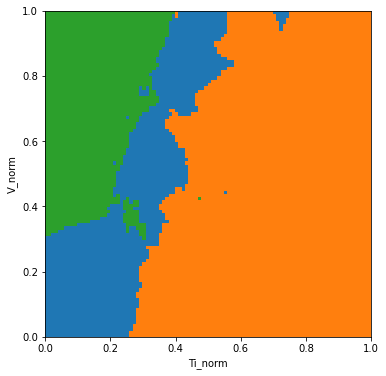

In [66]:
plt.figure(figsize=(6,6))
plt.pcolormesh(xx, yy, grid_classes, cmap=cmap)
plt.xlabel('Ti_norm')
plt.ylabel('V_norm')
plt.xlim(0,1)
plt.ylim(0,1)
plt.gca().set_aspect('equal', 'box')
plt.show()

### Compare los datos restantes (datos de prueba) con las regiones de clasificación

Coloque los datos de prueba en este gráfico y podrá ver de inmediato que, si bien el clasificador obtuvo muchos de los puntos correctamente, hay algunos puntos mal clasificados.

<ipython-input-67-61a166ad9365>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, grid_classes, cmap=cmap)


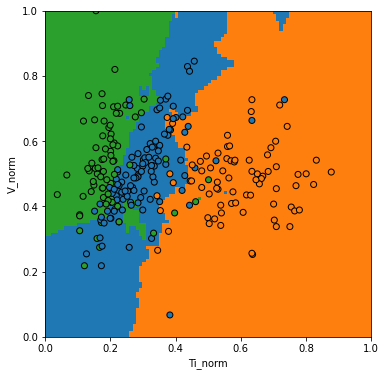

In [67]:
plt.figure(figsize=(6,6))
plt.pcolormesh(xx, yy, grid_classes, cmap=cmap)

plt.scatter(remaining_data['Ti_norm'],remaining_data['V_norm'],
                           color=remaining_data['color'],edgecolors='black')

plt.xlabel('Ti_norm')
plt.ylabel('V_norm')
plt.xlim(0,1)
plt.ylim(0,1)
plt.gca().set_aspect('equal', 'box')
plt.show()

### Estimando la precisión del clasificador

Dado que el conjunto de prueba se eligió al azar de la muestra original, debería preformarse con una precisión similar en la población general. Calculemos la tasa de éxito de la clasificación.

Ingresaremos los datos restantes (datos de prueba) en el clasificador y luego asignaremos estas afinidades clasificadas a una nueva columna en pandas.

In [68]:
remaining_classes = classifier_neighbors.predict(basalt_Ti_V_remaining)

In [69]:
remaining_data['predicted_class'] = remaining_classes

In [70]:
remaining_data.head()

,affinity,affinity code,color,SiO2 (wt%),TiO2 (wt%),Al2O3 (wt%),Fe2O3 (wt%),FeO (wt%),CaO (wt%),MgO (wt%),MnO (wt%),K2O (wt%),Na2O (wt%),P2O5(wt%),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Sc (ppm),V (ppm),Cr (ppm),Co (ppm),Ni (ppm),Cu (ppm),Zn (ppm),Ga (ppm),Rb (ppm),Sr (ppm),Y (ppm),Zr (ppm),Nb (ppm),Sn (ppm),Cs (ppm),Ba (ppm),Hf (ppm),Ta (ppm),Pb (ppm),Th (ppm),U (ppm),143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb,Ti_norm,V_norm,predicted_class
428,OIB,1,C1,45.10,1.88,10.43,3.47,8.92,8.59,15.74,0.19,0.570,1.80,0.310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,950.0,NaN,740.0,150.0,115.0,NaN,7.000,300.0,27.0,160.0,NaN,NaN,NaN,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.390852,0.654545,1
678,IAB,2,C2,49.05,0.97,17.14,4.60,4.16,11.59,5.11,0.16,2.070,3.20,0.420,50.00,76.0,NaN,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,227.0,59.0,32.0,38.0,NaN,NaN,NaN,57.000,520.0,26.0,145.0,14.00,NaN,NaN,620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201663,0.412727,2
144,MORB,0,C0,50.64,1.07,15.03,1.60,7.93,12.56,8.05,0.18,0.190,2.06,0.140,5.70,NaN,NaN,NaN,2.60,0.90,NaN,0.500,NaN,NaN,NaN,NaN,1.90,0.3,38.0,278.0,307.0,41.0,90.0,NaN,NaN,NaN,4.540,111.0,NaN,NaN,NaN,NaN,0.063,51.0,NaN,NaN,NaN,NaN,NaN,NaN,0.703070,NaN,NaN,NaN,0.222453,0.505455,0
74,MORB,0,C0,50.60,1.28,14.90,NaN,NaN,11.94,8.20,0.15,0.140,2.59,0.130,2.73,NaN,NaN,6.59,2.09,1.19,NaN,0.641,NaN,NaN,NaN,NaN,2.36,NaN,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,0.383,121.9,28.0,95.0,2.25,NaN,NaN,9.4,2.26,0.151,NaN,0.11,NaN,0.513173,0.702355,18.223,15.477,37.612,0.266112,0.454545,0
235,MORB,0,C0,51.46,1.26,16.79,7.49,NaN,11.39,7.37,0.13,0.383,3.28,0.176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.3,227.0,301.0,NaN,143.0,66.8,NaN,NaN,NaN,191.0,26.7,103.0,NaN,NaN,NaN,60.5,NaN,NaN,NaN,NaN,NaN,NaN,0.706120,NaN,NaN,NaN,0.261954,0.412727,0


Ahora tenemos una nueva columna de las afinidades clasificadas para los datos de prueba. También tenemos las afinidades reales dado que los datos originalmente se etiquetaron con clasificaciones.

In [71]:
remaining_data['correct_assignment'] = remaining_data['predicted_class'].eq(remaining_data['affinity code'])
remaining_data.head()

,affinity,affinity code,color,SiO2 (wt%),TiO2 (wt%),Al2O3 (wt%),Fe2O3 (wt%),FeO (wt%),CaO (wt%),MgO (wt%),MnO (wt%),K2O (wt%),Na2O (wt%),P2O5(wt%),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Sc (ppm),V (ppm),Cr (ppm),Co (ppm),Ni (ppm),Cu (ppm),Zn (ppm),Ga (ppm),Rb (ppm),Sr (ppm),Y (ppm),Zr (ppm),Nb (ppm),Sn (ppm),Cs (ppm),Ba (ppm),Hf (ppm),Ta (ppm),Pb (ppm),Th (ppm),U (ppm),143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb,Ti_norm,V_norm,predicted_class,correct_assignment
428,OIB,1,C1,45.10,1.88,10.43,3.47,8.92,8.59,15.74,0.19,0.570,1.80,0.310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,950.0,NaN,740.0,150.0,115.0,NaN,7.000,300.0,27.0,160.0,NaN,NaN,NaN,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.390852,0.654545,1,True
678,IAB,2,C2,49.05,0.97,17.14,4.60,4.16,11.59,5.11,0.16,2.070,3.20,0.420,50.00,76.0,NaN,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,227.0,59.0,32.0,38.0,NaN,NaN,NaN,57.000,520.0,26.0,145.0,14.00,NaN,NaN,620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201663,0.412727,2,True
144,MORB,0,C0,50.64,1.07,15.03,1.60,7.93,12.56,8.05,0.18,0.190,2.06,0.140,5.70,NaN,NaN,NaN,2.60,0.90,NaN,0.500,NaN,NaN,NaN,NaN,1.90,0.3,38.0,278.0,307.0,41.0,90.0,NaN,NaN,NaN,4.540,111.0,NaN,NaN,NaN,NaN,0.063,51.0,NaN,NaN,NaN,NaN,NaN,NaN,0.703070,NaN,NaN,NaN,0.222453,0.505455,0,True
74,MORB,0,C0,50.60,1.28,14.90,NaN,NaN,11.94,8.20,0.15,0.140,2.59,0.130,2.73,NaN,NaN,6.59,2.09,1.19,NaN,0.641,NaN,NaN,NaN,NaN,2.36,NaN,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,0.383,121.9,28.0,95.0,2.25,NaN,NaN,9.4,2.26,0.151,NaN,0.11,NaN,0.513173,0.702355,18.223,15.477,37.612,0.266112,0.454545,0,True
235,MORB,0,C0,51.46,1.26,16.79,7.49,NaN,11.39,7.37,0.13,0.383,3.28,0.176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.3,227.0,301.0,NaN,143.0,66.8,NaN,NaN,NaN,191.0,26.7,103.0,NaN,NaN,NaN,60.5,NaN,NaN,NaN,NaN,NaN,NaN,0.706120,NaN,NaN,NaN,0.261954,0.412727,0,True


In [72]:
remaining_data['correct_assignment'].value_counts(normalize=True) * 100

True     83.268482
False    16.731518
Name: correct_assignment, dtype: float64

### Uso de funciones de scikit-learn para obtener un valor de precisión usando la ténica del de vecino más cercano

Dado que este enfoque de dividir aleatoriamente los datos en grupos de entrenamiento y de prueba es bastante común en la clasificación de aprendizaje de maquinas, existen funciones integradas que son bastante convenientes  que se pueden usar para realizar de manera más compacta las mismas operaciones que hicimos anteriormente.

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(basalt_Ti_V, basalt_affinity_code,train_size=0.5)

# fit the model on one set of data
classifier_neighbors.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = classifier_neighbors.predict(X2)
accuracy_score(y2, y2_model)

0.8326848249027238

### Otros algoritmos de clasificación

Si va a la página de inicio de scikit-learn, encontrará muchos clasificadores disponibles: https://scikit-learn.org/stable/index.html. Están muy bien ilustrados en este código de la documentación de scikit-learn.

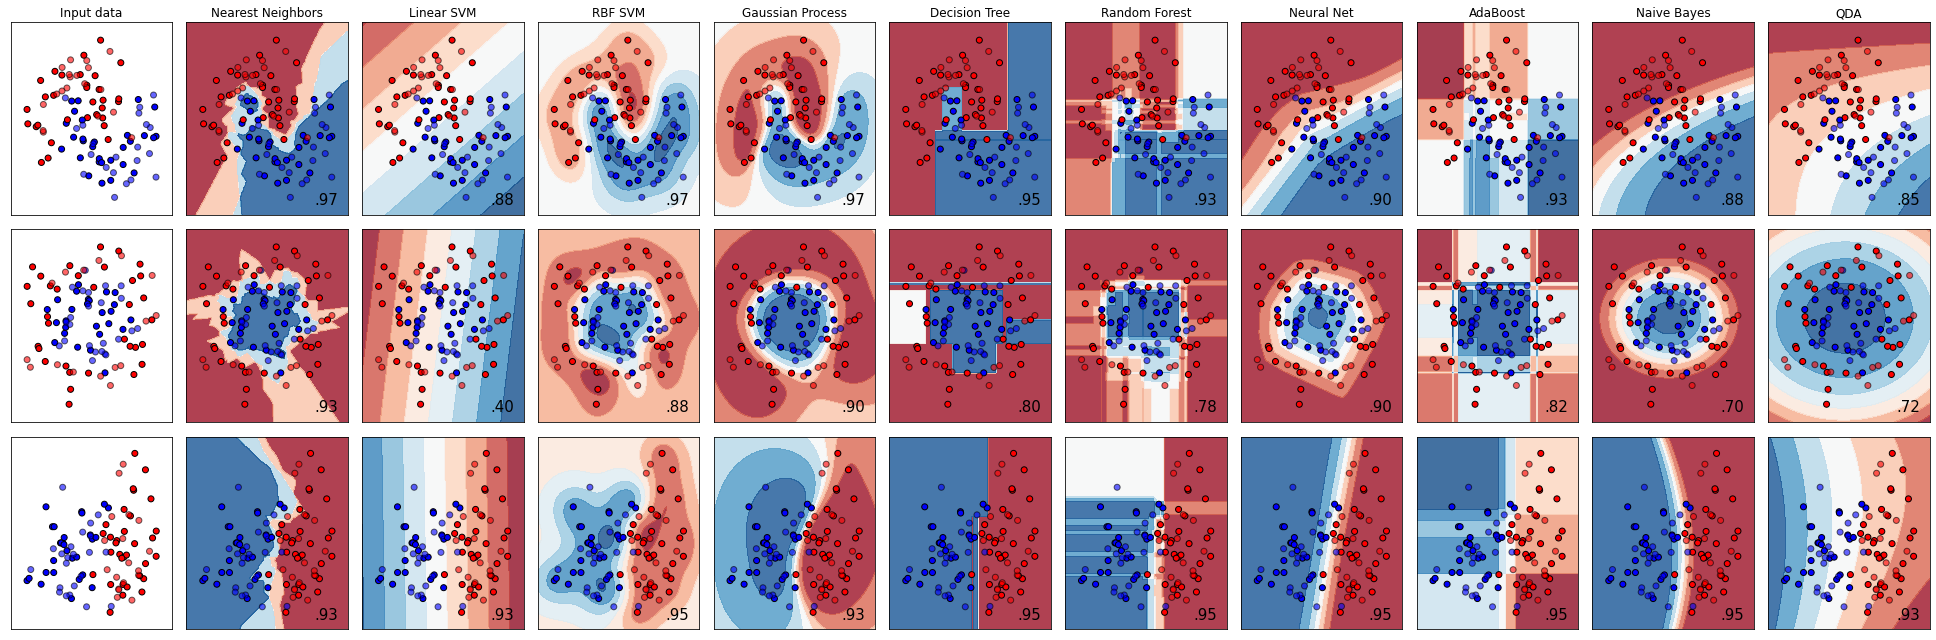

In [74]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

Como advertencia, no debemos dejarnos llevar demasiado. Claramente, existen complejidades relacionadas con este enfoque (nuestros valores de precisión no son tan altos). Shervais señala que:
> "Una evaluación más específica del entorno tectónico de estas y otras ofiolitas requiere aplicación de datos geológicos y petrológicos detallados, así como geoquímica. El diagrama de discriminación Ti / V, sin embargo, es un complemento potencialmente poderoso de estas técnicas ".

Además, nos gustaría poder asignar procesos físicos a la clasificación.

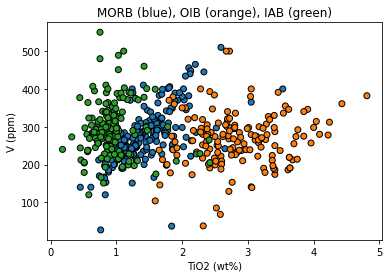

In [75]:
scatter_plot = plt.scatter(basalt_data['TiO2 (wt%)'],basalt_data['V (ppm)'],color=basalt_data['color'],edgecolors='black')
plt.xlabel('TiO2 (wt%)')
plt.ylabel('V (ppm)')
plt.title('MORB (blue), OIB (orange), IAB (green)')
plt.show()